### Looking at the data, we are to predict the number of times a user will listen to an artist.

we will nedd two more information to do this, number of friends a user have and artists popularity.

The first part will be done using the artists popularity alone.

The second part will be done by using the number of friends a user have and also the artists popularity .

import useful libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 

### loading the dataset and exploring it.

In [2]:
user_artist = pd.read_csv("/content/user_artist.csv")
user_artist.head()

,userID,artistID,weight
0,145,64135,131
1,145,71619,445
2,145,76710,74
3,145,77532,157
4,145,98678,67


In [3]:
user_artist.shape

(80602, 3)

In [4]:
user_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80602 entries, 0 to 80601
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   userID    80602 non-null  int64
 1   artistID  80602 non-null  int64
 2   weight    80602 non-null  int64
dtypes: int64(3)
memory usage: 1.8 MB


In [5]:
user_friends = pd.read_csv('/content/user_friends.csv')
user_friends.head()

,userID,friendID
0,145,102809
1,145,748640
2,211,982806
3,1539,40167
4,1539,298171


In [6]:
user_friends.shape

(25434, 2)

In [7]:
user_friends.describe()

,userID,friendID
count,25434.000000,25434.000000
mean,499582.749784,499582.749784
std,289704.889969,289704.889969
min,145.000000,145.000000
25%,249741.000000,249741.000000
50%,494923.000000,494923.000000
75%,757766.000000,757766.000000
max,999975.000000,999975.000000


In [8]:
user_friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25434 entries, 0 to 25433
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   userID    25434 non-null  int64
 1   friendID  25434 non-null  int64
dtypes: int64(2)
memory usage: 397.5 KB


In [9]:
test = pd.read_csv('/content/test.csv')
test.head()

,userID,artistID
0,703680,155818
1,801034,674816
2,872331,448393
3,975852,181501
4,563786,589532


In [10]:
test.shape

(3000, 2)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   userID    3000 non-null   int64
 1   artistID  3000 non-null   int64
dtypes: int64(2)
memory usage: 47.0 KB


In [12]:
for column in user_artist.columns:
    print(f"{column} --> {user_artist[column].nunique()}")

userID --> 1891
artistID --> 16529
weight --> 5068


In [13]:
for column in user_friends.columns:
    print(f"{column} --> {user_friends[column].nunique()}")

userID --> 1892
friendID --> 1892


In [14]:
for column in test.columns:
    print(f"{column} --> {test[column].nunique()}")

userID --> 1433
artistID --> 893


### Getting users Ids

In [15]:
# appending the unique users in user_friends to a list.
train_users = []
for user in user_artist['userID'].unique():
    train_users.append(user)
print(len(train_users))

1891


In [16]:
# appending the unique users in user_friends to a list.
friend_users = []
for user in user_friends['userID'].unique():
    friend_users.append(user)
print(len(friend_users))

1892


In [17]:
# appending the unique users in user_friends to a list.
test_users = []
for user in test['userID'].unique():
    test_users.append(user)
print(len(test_users))

1433


#### Checking if we have the same users in artist_train and user_friends set.

In [18]:
missing = []
for i in friend_users:
    if i not in train_users:
        missing.append(i)
print(len(missing))

1


In [19]:
user_friends = user_friends.drop(1, axis=0)

In [20]:
missing = []
for i in test_users:
    if i not in train_users:
        missing.append(i)
print(len(missing))

1


In [21]:
# dropping that row.

test = test.drop(1, axis=0)

In [22]:
# appending the unique users in user_friends to a list.
friend_user = []
for user in user_friends['userID'].unique():
    friend_user.append(user)
print(len(friend_user))

test_user = []
for user in test['userID'].unique():
    test_user.append(user)
print(len(test_users))

1892
1433


In [23]:
print(len(test_user))

1433


In [24]:
print(len(friend_user))

1892


#### Checking for artist

In [25]:
# appending the unique users in user_friends to a list.
train_artists = []
for artist in user_artist['artistID'].unique():
    train_artists.append(user)
print(len(train_artists))

16529


In [26]:
# appending the unique users in user_friends to a list.
test_artists = []
for artist in test['artistID'].unique():
    test_artists.append(user)
print(len(test_artists))

893


In [27]:
missing = []
for i in test_artists:
    if i in train_artists:
        missing.append(i)
print(len(missing))

893


#### checking for the number friends each user have.

In [28]:
# appending the unique users in user_friends to a list.
friends = []
for friend in user_friends['friendID'].unique():
    friends.append(friend)
print(len(friends))

1892


In [29]:
# counting the number of friends a user have 
num_friends = []
for i in friend_users:
    count = user_friends['userID'].tolist().count(i)
    num_friends.append(count)

In [30]:
print(len(num_friends))

1892


In [31]:
friends_of_users = {}
for i in range(len(num_friends)):
    friends_of_users[friend_users[i]] = num_friends[i]
friends_of_users

{145: 1,
 211: 1,
 1539: 7,
 2214: 1,
 3028: 18,
 3859: 9,
 5334: 18,
 5545: 3,
 5795: 2,
 6135: 25,
 7848: 7,
 8724: 8,
 8900: 4,
 9034: 2,
 9072: 6,
 9421: 3,
 9797: 3,
 10146: 3,
 10243: 13,
 12180: 9,
 12494: 2,
 12778: 5,
 13084: 12,
 13163: 4,
 13713: 3,
 14468: 5,
 14688: 3,
 15310: 8,
 15762: 42,
 16154: 3,
 16583: 5,
 16948: 18,
 17180: 16,
 17887: 3,
 18043: 40,
 20501: 4,
 21197: 11,
 21485: 2,
 21488: 16,
 21793: 30,
 22741: 3,
 22745: 17,
 23096: 1,
 23413: 53,
 23425: 30,
 23921: 1,
 24356: 11,
 24807: 7,
 24901: 2,
 25050: 1,
 25155: 16,
 25383: 2,
 26286: 8,
 26577: 13,
 27282: 1,
 28913: 11,
 28983: 2,
 29229: 95,
 29341: 59,
 29847: 8,
 30144: 4,
 30404: 1,
 30564: 1,
 30727: 3,
 31327: 2,
 31383: 33,
 32224: 4,
 32513: 7,
 32806: 19,
 32813: 21,
 32820: 4,
 33121: 2,
 33155: 19,
 33464: 3,
 33622: 8,
 33893: 1,
 35301: 12,
 35632: 79,
 35953: 4,
 36420: 30,
 36970: 6,
 36989: 1,
 38683: 5,
 38878: 4,
 39732: 9,
 39784: 2,
 40056: 5,
 40167: 25,
 40242: 9,
 40413: 7,


In [32]:
# Appending the number of friends a user have to a list.

friends = []
for i in user_artist['userID']:
            value = friends_of_users.get(i)
            friends.append(value)

In [33]:
print(len(friends))

80602


In [34]:
friends


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,

In [35]:
# creating a new dataframe that taekes in the number of friends a user have.

user_artist['user_friends'] = friends

In [36]:
user_artist.head()

,userID,artistID,weight,user_friends
0,145,64135,131,1
1,145,71619,445,1
2,145,76710,74,1
3,145,77532,157,1
4,145,98678,67,1


In [37]:
# Repeating the same thing for the test dataset.

test_friends = []
for i in test['userID']:
            value = friends_of_users.get(i)
            test_friends.append(value)

In [38]:
print(len(test_friends))

2999


In [39]:
test['user_friends'] = test_friends

In [40]:
test.head()

,userID,artistID,user_friends
0,703680,155818,32
2,872331,448393,31
3,975852,181501,5
4,563786,589532,4
5,680731,173540,1


In [41]:
# checking for the unique artists in the artists

artists = []
for i in user_artist['artistID'].unique():
    artists.append(i)
    
print(len(artists))

16529


In [42]:
# checking for the popularity of the of each artist by counting the number of artists in the dataset

artist_count = []
for i in artists:
    artist_list = user_artist['artistID'].tolist()
    count = artist_list.count(i)
    artist_count.append(count)

In [43]:
# creating a dictionary for artist popularity
artist_popularity = {}
for i in range(len(artists)):
    artist_popularity[artists[i]] = artist_count[i]

In [44]:
len(artist_popularity)

16529

In [45]:
# Now creating a list to create a dataframe for the artist popularity

artists_popularity = []
for i in user_artist['artistID']:
            value = artist_popularity.get(i)
            artists_popularity.append(value)

In [46]:
print(len(artists_popularity))

80602


In [47]:
# creating a new dataframe for the artist popularity


user_artist['artist_popularity'] = artists_popularity

In [48]:
user_artist.isna().sum()

userID               0
artistID             0
weight               0
user_friends         0
artist_popularity    0
dtype: int64

In [49]:
user_artist.head()

,userID,artistID,weight,user_friends,artist_popularity
0,145,64135,131,1,404
1,145,71619,445,1,146
2,145,76710,74,1,60
3,145,77532,157,1,43
4,145,98678,67,1,21


In [50]:
len(artists)

16529

In [51]:
# Now creating a list to create a dataframe for the artist popularity

test_artists_popularity = []
for i in test['artistID']:
    value = artist_popularity.get(i)
    test_artists_popularity.append(value)

In [52]:
print(len(test_artists_popularity))

2999


In [53]:
test.shape

(2999, 3)

In [54]:
# doing the same for the test data

test['artist_popularity'] = test_artists_popularity

In [55]:
test.head()

,userID,artistID,user_friends,artist_popularity
0,703680,155818,32,261.0
2,872331,448393,31,NaN
3,975852,181501,5,199.0
4,563786,589532,4,44.0
5,680731,173540,1,100.0


In [56]:
# filling the NaN with thw median

test = test.fillna(test.median())

In [57]:
test.head()

,userID,artistID,user_friends,artist_popularity
0,703680,155818,32,261.0
2,872331,448393,31,70.0
3,975852,181501,5,199.0
4,563786,589532,4,44.0
5,680731,173540,1,100.0


In [58]:
test.shape

(2999, 4)

Checking the dataset for outliers so as to proprely train the model for the predictions we want to make.

In [59]:
num_column = ['user_friends', 'artist_popularity']
cat_column = ['userID', 'artistID']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


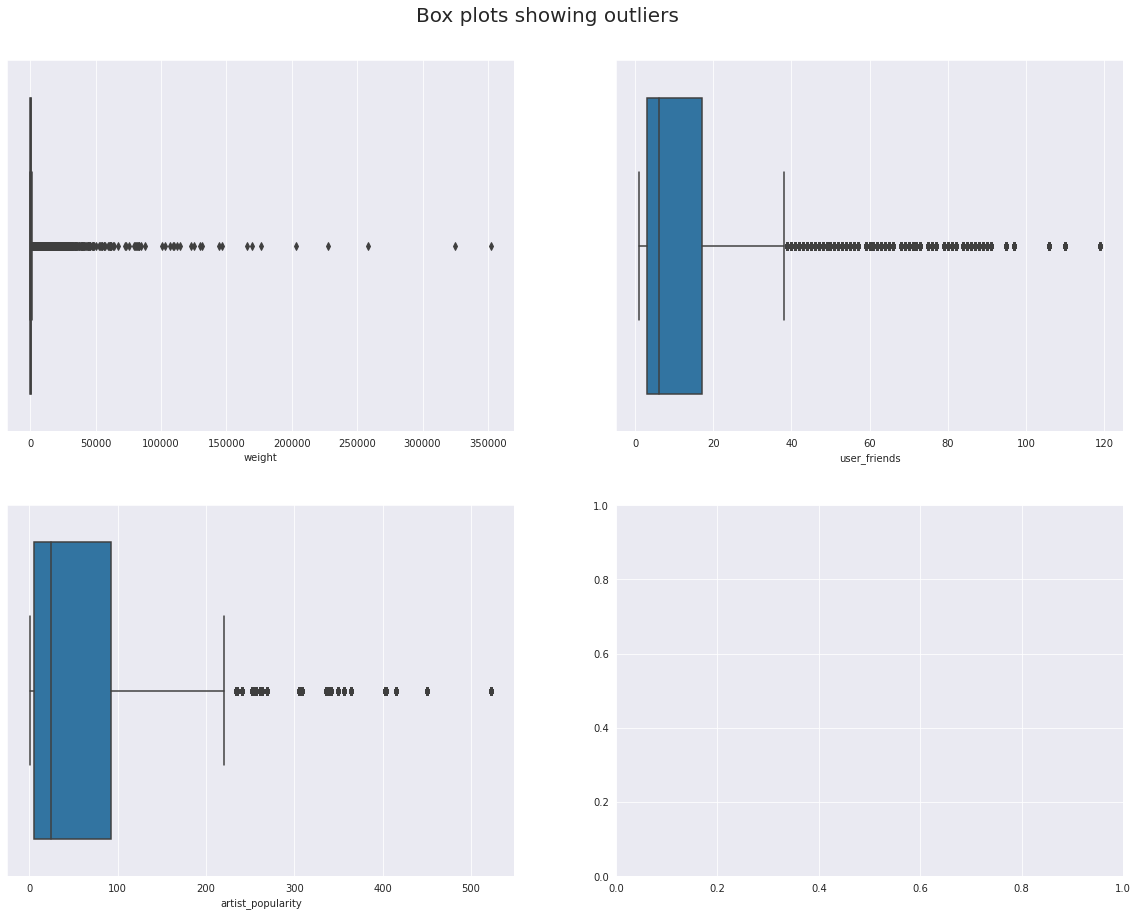

In [60]:
import matplotlib.pyplot as plt

# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 20)

for ax, data, name in zip(axes.flatten(), user_artist, ['weight', 'user_friends', 'artist_popularity']):
  sns.boxplot(user_artist[name], ax = ax)

In [61]:
# choosing a quantile range to remove outliers 

min_threshold_1, max_threshold_1 =user_artist['user_friends'].quantile([0.09, 0.91])
min_threshold_1, max_threshold_1

(1.0, 39.0)

In [62]:
# choosing a quantile range to remove outliers 

min_threshold_2, max_threshold_2 =user_artist['artist_popularity'].quantile([0.09, 0.91])
min_threshold_2, max_threshold_2

(1.0, 235.0)

In [63]:
# choosing a quantile range to remove outliers 

min_threshold_3, max_threshold_3 =user_artist['weight'].quantile([0.05, 0.95])
min_threshold_3, max_threshold_3

(15.0, 2303.949999999997)

In [64]:
# Now selecting the datapoints that falls within this range in the dataset.

user_artist = user_artist[(user_artist.user_friends >min_threshold_1) & (user_artist.user_friends  < max_threshold_1)]

In [65]:
# Now selecting the datapoints that falls within this range in the dataset.

user_artist = user_artist[(user_artist.artist_popularity >min_threshold_2) & (user_artist.artist_popularity  < max_threshold_2)]

In [66]:
# Now selecting the datapoints that falls within this range in the dataset.

user_artist = user_artist[(user_artist.weight >min_threshold_3) & (user_artist.weight < max_threshold_3)]

In [67]:
# A new dataset we can make use of.

user_artist.head()

,userID,artistID,weight,user_friends,artist_popularity
46,1539,34924,679,7,86
47,1539,168259,602,7,45
48,1539,209750,577,7,138
49,1539,226186,942,7,14
50,1539,287725,707,7,3


In [68]:
user_artist.shape

(46464, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


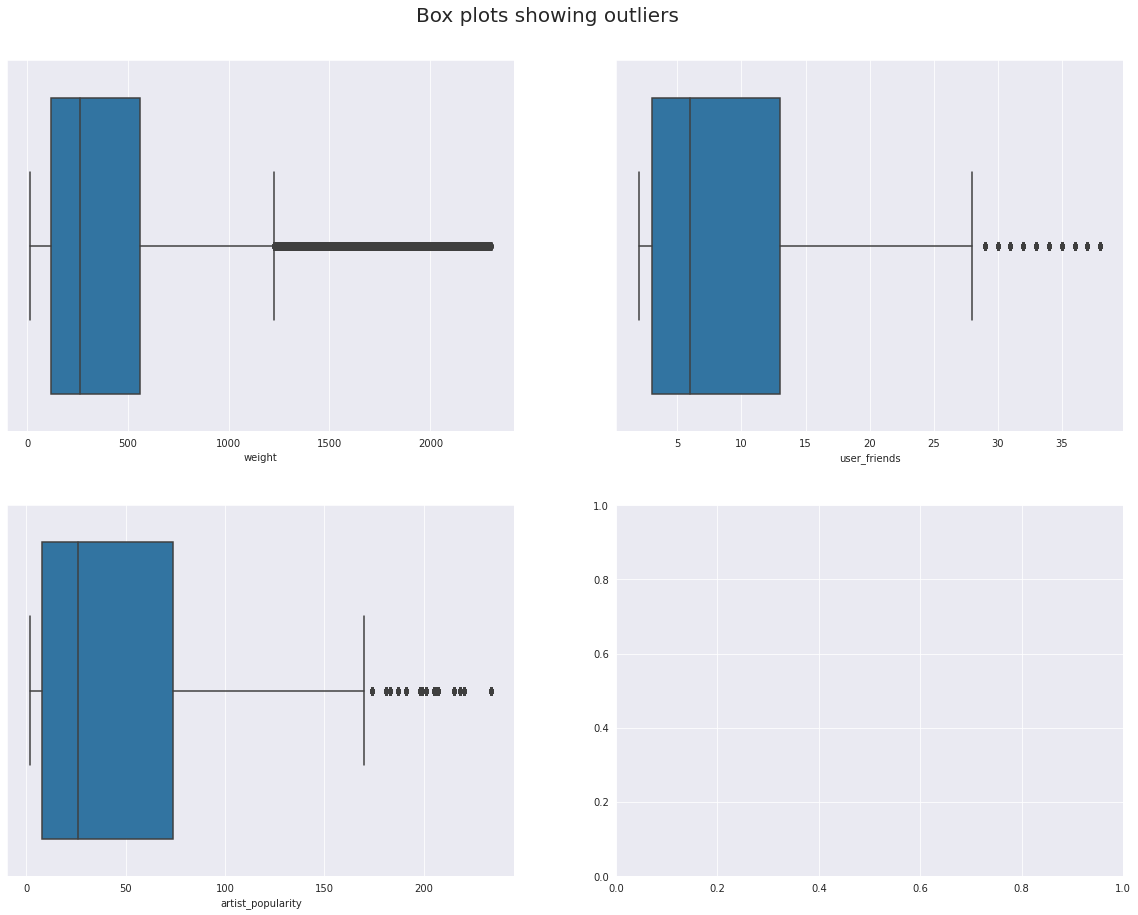

In [69]:
# Looking at the result and check the remianing outliers we have.
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 20)

for ax, data, name in zip(axes.flatten(), user_artist,['weight', 'user_friends', 'artist_popularity']):
  sns.boxplot(user_artist[name], ax = ax)

This looks to wrok with.

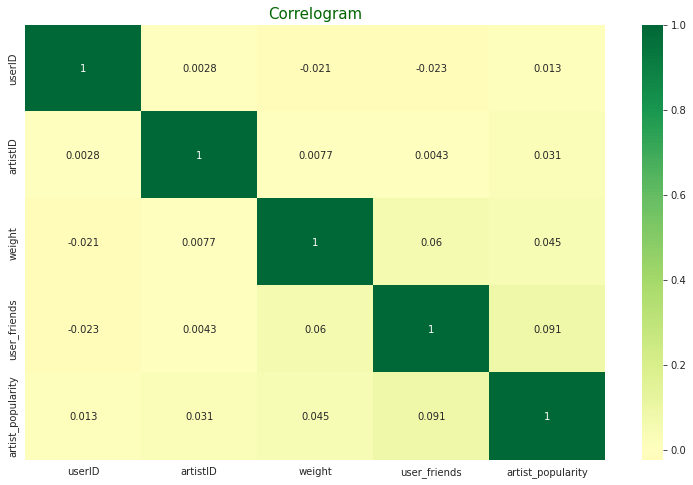

In [70]:
# Quantify correlations
corr = user_artist.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [71]:
# creating our target variable which is the weight.

user_artist_weight = user_artist['weight']
user_artist = user_artist.drop('weight', axis=1)

In [72]:
# using standard scaler for artist_popularity and user friends. so as to make the scale good for the model to make use of.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()


In [73]:
# fiting the transformer

user_artist_scaled = scaler.fit_transform(user_artist[num_column])
test_scaled_num = scaler.fit_transform(test[num_column])

In [74]:
user_artist_scaled

array([[-0.32160828,  0.6165711 ],
       [-0.32160828, -0.10144475],
       [-0.32160828,  1.52722534],
       ...,
       [ 0.59549751, -0.85448576],
       [ 0.59549751, -0.85448576],
       [ 0.59549751, -0.85448576]])

In [75]:
# converting the remaining part of the dataset to a numpy array for uniformity in data structure.

user_artist_cat = user_artist[cat_column].to_numpy()
test_cat = test[cat_column].to_numpy()

In [76]:
# combining both arrays to have the complete dataset.

user_artist_prepared = np.concatenate((user_artist_scaled, user_artist_cat), axis=1)
test_prepared = np.concatenate((test_scaled_num, test_cat), axis=1)

### Now doing the second part which is to use the artists popularity and the number of friend a user have.

In [77]:
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(user_artist_prepared, test_size=0.2, random_state=42)


In [78]:
train_label, val_label = train_test_split(user_artist_weight, test_size=0.2, random_state=42)

### Modeling

Random_forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(train_set, train_label)

RandomForestRegressor(random_state=42)

In [81]:
pred = rf_reg.predict(val_set)

In [82]:
# Getting the prediction.

pred[:20]

array([ 102.88,  536.54,  910.59,  666.39,  399.7 ,  644.77, 1206.77,
        820.03,  525.51,  589.4 ,  574.5 ,  160.17,  361.21,  417.  ,
        201.51,  443.58, 1319.35,  273.59,  836.19,   62.68])

In [84]:
val_label[:20]

47165     230
12224     516
35200     650
62765     443
25480     252
7255      643
24576    1408
56694     669
32136     500
31809     169
68009     302
58781     196
31909    1189
34183     136
59527      68
69705     987
11552     967
65124     187
25595    1198
16614      74
Name: weight, dtype: int64

In [85]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error

mean_absolute_error(val_label, pred)


247.8386021736791

In [86]:
# Root Mean Square Error

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(val_label, pred))

362.8962697581496

Using Linear Regressor

In [87]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_set, train_label)

LinearRegression()

In [88]:
# Getting the prediction also

pred = ln_reg.predict(val_set)

In [89]:
# Mean Absolute Error

mean_absolute_error(val_label, pred)

325.13335227468747

In [90]:
# Root Mean Square Error

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(val_label, pred))

439.73184693048836

### Decision Tree Regressor

In [91]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(train_set, train_label)

DecisionTreeRegressor()

In [92]:
pred = dt_reg.predict(val_set)

In [93]:
# Mean absolute error


mean_absolute_error(val_label, pred)

305.9314537824169

In [94]:
# Root Mean Square Error

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(val_label, pred))

490.77473512063995

Looking at the results we have. The least is error comes from the Random Tree Regressor

In [95]:
 # Predicting the number of times a user will listen to an Artist using the Random Forest Regressor model

 test_pred = rf_reg.predict(test_prepared)

In [96]:
test_pred[:20]

array([ 507.21,  540.87,  867.04,  267.11,  224.19,  716.04,  452.51,
        383.93,  101.46, 1159.97,  344.28,  200.62,  441.15,  145.43,
        716.94,  287.52,  580.32, 1482.17,  330.29,  610.81])

In [97]:
# Approximating every number in the list to eiminate the decimals

Test_prediction = [round(num) for num in test_pred]

In [98]:
Test_prediction

[507,
 541,
 867,
 267,
 224,
 716,
 453,
 384,
 101,
 1160,
 344,
 201,
 441,
 145,
 717,
 288,
 580,
 1482,
 330,
 611,
 164,
 326,
 433,
 1195,
 242,
 298,
 427,
 486,
 266,
 467,
 399,
 695,
 414,
 590,
 178,
 414,
 379,
 425,
 471,
 442,
 389,
 841,
 532,
 544,
 239,
 500,
 419,
 269,
 631,
 443,
 661,
 663,
 623,
 276,
 302,
 281,
 311,
 774,
 177,
 430,
 361,
 226,
 334,
 97,
 429,
 371,
 653,
 736,
 290,
 898,
 536,
 590,
 415,
 277,
 240,
 443,
 554,
 1214,
 1111,
 505,
 336,
 852,
 182,
 404,
 487,
 848,
 247,
 193,
 475,
 326,
 238,
 696,
 228,
 845,
 286,
 893,
 336,
 207,
 598,
 336,
 495,
 690,
 408,
 474,
 452,
 765,
 366,
 680,
 258,
 628,
 416,
 519,
 276,
 136,
 584,
 700,
 510,
 480,
 300,
 362,
 328,
 150,
 444,
 251,
 906,
 289,
 166,
 465,
 320,
 1188,
 563,
 308,
 663,
 352,
 479,
 188,
 449,
 162,
 238,
 330,
 1132,
 411,
 774,
 290,
 568,
 286,
 213,
 504,
 1183,
 299,
 332,
 512,
 391,
 379,
 566,
 255,
 653,
 682,
 518,
 380,
 343,
 316,
 950,
 214,
 482,
 20

Now to the first part of not including the Social Network.

In [99]:
user_artist.head()

,userID,artistID,user_friends,artist_popularity
46,1539,34924,7,86
47,1539,168259,7,45
48,1539,209750,7,138
49,1539,226186,7,14
50,1539,287725,7,3


In [100]:
# since what we took from the social network is the user friends information. since we have no use of it here, let's drop it.

user_artist_1 = user_artist.drop('user_friends', axis=1)

In [101]:
# Splitting the dataset here also for validation

train_set, val_set = train_test_split(user_artist_1, test_size=0.2, random_state=42)


In [102]:
train_label, val_label = train_test_split(user_artist_weight, test_size=0.2, random_state=42)

In [103]:
# Now training this using the previous sets of modesls.

rf_1 = RandomForestRegressor()
rf_1.fit(train_set, train_label)

RandomForestRegressor()

In [104]:
pred = rf_1.predict(val_set)

In [105]:
# Mean absolute error


mean_absolute_error(val_label, pred)

267.75868503174433

In [106]:
# Root Mean Square Error


np.sqrt(mean_squared_error(val_label, pred))

383.99810550286037

In [107]:
# looks poor compared to the previous ones.

# Linear Regressor

lr_1 = LinearRegression()
lr_1.fit(train_set, train_label)

LinearRegression()

In [108]:
pred = lr_1.predict(val_set)

In [109]:
# Mean absolute error


mean_absolute_error(val_label, pred)

325.5582053937835

In [110]:
# Root Mean Square Error


np.sqrt(mean_squared_error(val_label, pred))

440.4263643062084

Looking at this output, the first model performed better.

Predicting the Test set

In [111]:
test.head()

,userID,artistID,user_friends,artist_popularity
0,703680,155818,32,261.0
2,872331,448393,31,70.0
3,975852,181501,5,199.0
4,563786,589532,4,44.0
5,680731,173540,1,100.0


In [112]:
test_1 = test.drop('user_friends', axis=1)

In [113]:
# Test set prediction using the first model

test_pred = rf_1.predict(test_1)

In [114]:
test_pred

array([364.89, 937.92, 945.15, ..., 182.55, 690.63, 720.19])

In [115]:
# Rounding up to get rid of the decimals


Test_prediction_1 = [round(num) for num in test_pred]

In [116]:
Test_prediction_1

[365,
 938,
 945,
 215,
 314,
 477,
 735,
 647,
 355,
 205,
 535,
 149,
 460,
 484,
 169,
 523,
 627,
 1613,
 397,
 598,
 332,
 728,
 458,
 1051,
 342,
 239,
 932,
 525,
 1035,
 273,
 586,
 594,
 702,
 813,
 193,
 369,
 421,
 1018,
 983,
 178,
 480,
 403,
 318,
 330,
 160,
 544,
 731,
 565,
 621,
 262,
 493,
 401,
 626,
 205,
 322,
 355,
 127,
 701,
 381,
 491,
 437,
 372,
 306,
 488,
 191,
 334,
 450,
 331,
 410,
 592,
 329,
 312,
 272,
 517,
 272,
 600,
 559,
 997,
 392,
 192,
 207,
 490,
 255,
 343,
 404,
 537,
 213,
 335,
 378,
 81,
 356,
 393,
 353,
 1161,
 103,
 1122,
 288,
 670,
 888,
 269,
 678,
 699,
 533,
 188,
 129,
 739,
 214,
 885,
 177,
 612,
 433,
 39,
 201,
 279,
 138,
 523,
 307,
 340,
 390,
 668,
 343,
 294,
 422,
 168,
 1208,
 313,
 148,
 946,
 705,
 1292,
 343,
 398,
 826,
 235,
 226,
 328,
 393,
 156,
 535,
 953,
 802,
 427,
 488,
 213,
 420,
 285,
 245,
 698,
 353,
 295,
 304,
 294,
 522,
 346,
 681,
 551,
 639,
 489,
 514,
 475,
 544,
 68,
 1160,
 226,
 836,
 317